<a href="https://colab.research.google.com/github/OctavaOrigin/Classic-Machine-Learning/blob/main/AB_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дисперсионный анализ и A/B-тесты

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

### Блок 1

Даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

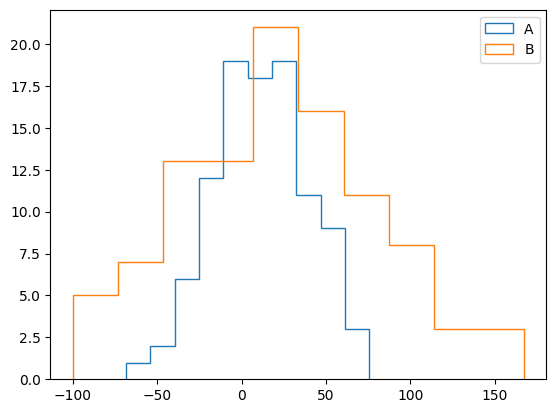

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

plt.hist(A, histtype='step', label='A')
plt.hist(B, histtype='step', label='B')
plt.legend()

In [ ]:
t, p = stats.ttest_ind(A, B)
print(t)
print(p)
if p > 0.05:
  print('Отклоняем нулевую гипотезу, средние отличаются')
else:
  print('Принимаем нулевую гипотезу, средние не отличаются')

-1.733800647210997
0.08451003973499756
Отклоняем нулевую гипотезу, средние отличаются


Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`

Статистически значимые различия есть


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb81d892f20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb81d841390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb81d892c80>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb81d8428f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb81d843580>,
 'means': []}

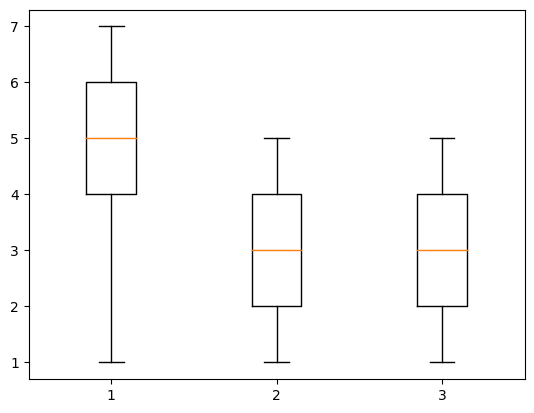

In [ ]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

from scipy.stats import f_oneway

f_value, p_value = f_oneway(water, nutri, mineral)
if p_value < 0.05:
  print('Статистически значимые различия есть')

plt.boxplot([nutri, water, mineral])


#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона


In [ ]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

<ipython-input-3-1e6d6fedfab1>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

Оук не прав
0.9999


([<matplotlib.axis.XTick at 0x7fb1f08e8f40>,
 [Text(1, 0, 'grass'), Text(2, 0, 'rock')])

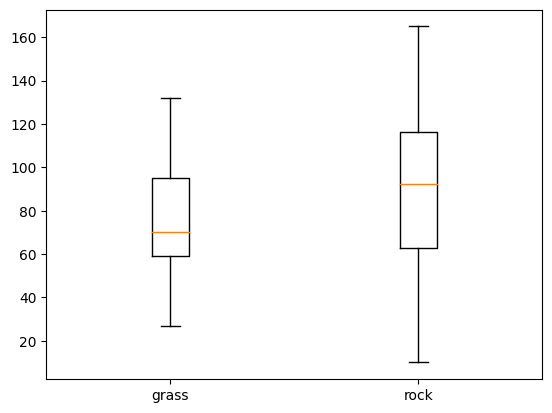

In [ ]:
pokemon_grass = pokemon.loc[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) | ((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock'))]
pokemon_rock = pokemon.loc[((pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock')) | ((pokemon['Class 2'] != 'Grass') & (pokemon['Class 1'] == 'Rock'))]

grass_attacks = pokemon_grass['Attack'].values
rock_attacks = pokemon_rock['Attack'].values

stat, p = stats.ttest_ind(grass_attacks, rock_attacks, alternative='greater')

if (p > 0.05):
  print('Оук не прав')
  print(round(p, 4))
else:
  print('Оук был прав, покумены из класса grass "бьют" сильнее')
  print(p)

plt.boxplot([grass_attacks, rock_attacks])
plt.xticks(range(1, 3), labels=['grass', 'rock'])



**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`.

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание:
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

Оук был прав, в классе water покемоны быстрее


([<matplotlib.axis.XTick at 0x7fb1f0778610>,
 [Text(1, 0, 'water'), Text(2, 0, 'normal')])

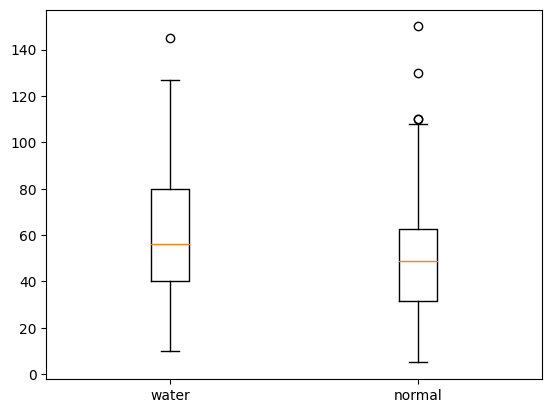

In [ ]:
pokemon_water = pokemon.loc[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) | ((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal'))]
pokemon_normal = pokemon.loc[((pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] == 'Normal')) | ((pokemon['Class 2'] != 'Water') & (pokemon['Class 1'] == 'Normal'))]

water_speed = pokemon_grass['Speed'].values
normal_speed = pokemon_rock['Speed'].values

stat, p = stats.ttest_ind(water_speed, normal_speed, alternative='greater')

if (p < 0.05):
  print('Оук был прав, в классе water покемоны быстрее')
else:
  print('Оук был не прав, в классе water покемоны не быстрее')
  print(p)

plt.boxplot([water_speed, normal_speed])
plt.xticks(range(1, 3), labels=['water', 'normal'])

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`).
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.

In [ ]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

Скорости и правда различаются


([<matplotlib.axis.XTick at 0x7fb81cec55a0>,
 [Text(1, 0, 'tp_speed'), Text(2, 0, 'everybody else`s speed')])

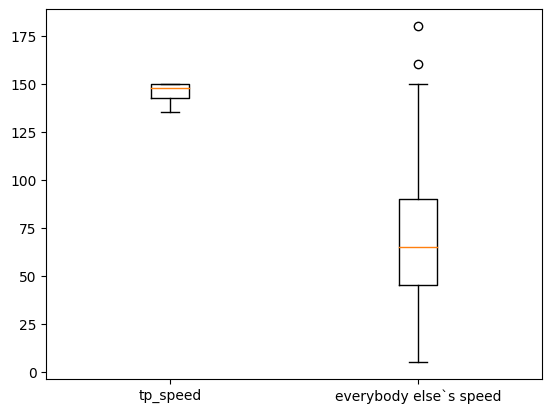

In [ ]:
pokemon_tp = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]
pokemon_tp_speed = pokemon_tp['Speed'].values
pokemon_else = pokemon.loc[~(pokemon['Name'].isin(treathed_pokemon))]
pokemon_else_speed = pokemon_else['Speed'].values

stat, p = stats.ttest_ind(pokemon_tp_speed, pokemon_else_speed)
if p > 0.05:
  print('Безумие не окупилось')
else:
  print('Скорости и правда различаются')

plt.boxplot([pokemon_tp_speed, pokemon_else_speed])
plt.xticks(range(1, 3), labels=['tp_speed', 'everybody else`s speed'])

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов.
Оук предложил разобраться в этом Вам.

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

Суммы у легендарных выше


([<matplotlib.axis.XTick at 0x7fb1f07f6530>,
 [Text(1, 0, 'legendary'), Text(2, 0, 'not legendary')])

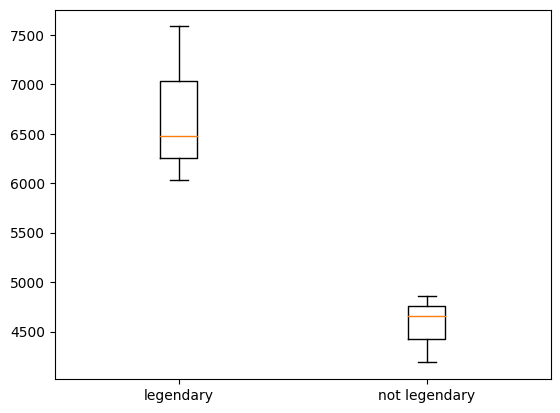

In [ ]:
pokemon_legendary = pokemon.loc[pokemon['Legendary'] == True, ['HP', 'Attack', 'Defense']].sum().values
pokemon_not_legendary = pokemon.loc[pokemon['Legendary'] == False, ['HP', 'Attack', 'Defense']]
pokemon_not_legendary = pokemon_not_legendary.sample(n = pokemon.loc[pokemon['Legendary'] == True, ['pid']].count()[0])
pokemon_not_legendary = pokemon_not_legendary.sum().values

stat, p = stats.ttest_ind(pokemon_legendary, pokemon_not_legendary, alternative='greater')
if p < 0.05:
  print('Суммы у легендарных выше')
else:
  print('Суммы у легендарных НЕ выше')

plt.boxplot([pokemon_legendary, pokemon_not_legendary])
plt.xticks(range(1, 3), labels=['legendary', 'not legendary'])

Произведения у легендарных выше


([<matplotlib.axis.XTick at 0x7fb1f06a4550>,
 [Text(1, 0, 'legendary'), Text(2, 0, 'not legendary')])

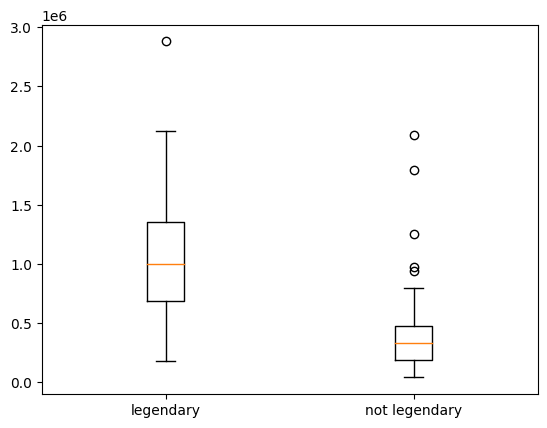

In [ ]:
pokemon_legendary = pokemon.loc[pokemon['Legendary'] == True, ['HP', 'Attack', 'Defense']].prod(axis=1).values
pokemon_not_legendary = pokemon.loc[pokemon['Legendary'] == False, ['HP', 'Attack', 'Defense']]
pokemon_not_legendary = pokemon_not_legendary.sample(n = pokemon.loc[pokemon['Legendary'] == True, ['pid']].count()[0])

pokemon_not_legendary = pokemon_not_legendary.prod(axis=1).values

stat, p = stats.ttest_ind(pokemon_legendary, pokemon_not_legendary, alternative='greater')
if p < 0.05:
  print('Произведения у легендарных выше')
else:
  print('Произведения у легендарных НЕ выше')

plt.boxplot([pokemon_legendary, pokemon_not_legendary])
plt.xticks(range(1, 3), labels=['legendary', 'not legendary'])

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь!

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [ ]:
rock = pokemon.loc[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock'), ['Defense']].values
ground = pokemon.loc[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground'), ['Defense']].values
steel = pokemon.loc[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel'), ['Defense']].values
ice = pokemon.loc[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice'), ['Defense']].values

stat, p = f_oneway(*[rock, ground, steel, ice])

if p < 0.05:
  print('Статистические различия в `защите` есть')


Статистические различия в `защите` есть
